<h1 color='Green'>EDA</h1>

In [43]:
#preprocessing stage
#own libs
import sys 
sys.path.append('../src')
from db_connection import conn
#public libs
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
#Load the dataset until sql
q = 'SELECT * FROM criminal_mind_raw' #Query to load all columns from the raw data table
df_raw = pd.read_sql(sql=q, con=conn.engine) #Use pd to load the data in python

In [45]:
df_raw.head(5) #Show the first 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,None,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,None,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,None,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,None,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,None,34.0944,-118.3277


In [46]:
df_raw.shape #Show the Number of records

(966951, 28)

In [47]:
columns = list(df_raw.keys()) #save the columns names as a list
print(columns) #show this list

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966951 entries, 0 to 966950
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           966951 non-null  int64  
 1   Date Rptd       966951 non-null  object 
 2   DATE OCC        966951 non-null  object 
 3   TIME OCC        966951 non-null  int64  
 4   AREA            966951 non-null  int64  
 5   AREA NAME       966951 non-null  object 
 6   Rpt Dist No     966951 non-null  int64  
 7   Part 1-2        966951 non-null  int64  
 8   Crm Cd          966951 non-null  int64  
 9   Crm Cd Desc     966951 non-null  object 
 10  Mocodes         826575 non-null  object 
 11  Vict Age        966951 non-null  int64  
 12  Vict Sex        833245 non-null  object 
 13  Vict Descent    833235 non-null  object 
 14  Premis Cd       966937 non-null  float64
 15  Premis Desc     966375 non-null  object 
 16  Weapon Used Cd  325476 non-null  float64
 17  Weapon Des

In [49]:
weapon_list = list(df_raw[df_raw['Weapon Desc'].notna()]['Weapon Desc'].unique()) #Save the exist weapons in the dataset on a list
print(weapon_list)#show this list
print('Total Weapons: ',len(weapon_list))

['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'VEHICLE', 'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'BELT FLAILING INSTRUMENT/CHAIN', 'HAND GUN', 'UNKNOWN FIREARM', 'KNIFE WITH BLADE 6INCHES OR LESS', 'FIXED OBJECT', 'KITCHEN KNIFE', 'MACHETE', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'MACE/PEPPER SPRAY', 'STICK', 'OTHER KNIFE', 'PHYSICAL PRESENCE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'HAMMER', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SEMI-AUTOMATIC PISTOL', 'SIMULATED GUN', 'RAZOR', 'OTHER FIREARM', 'FOLDING KNIFE', 'PIPE/METAL PIPE', 'ROCK/THROWN OBJECT', 'RIFLE', 'OTHER CUTTING INSTRUMENT', 'FIRE', 'REVOLVER', 'BOTTLE', 'SCISSORS', 'SWITCH BLADE', 'BRASS KNUCKLES', 'CLUB/BAT', 'BLUNT INSTRUMENT', 'BOARD', 'STUN GUN', 'CLEAVER', 'RAZOR BLADE', 'SCREWDRIVER', 'SHOTGUN', 'CONCRETE BLOCK/BRICK', 'CAUSTIC CHEMICAL/POISON', 'SEMI-AUTOMATIC RIFLE', 'SCALDING LIQUID', 'TIRE IRON', 'BOWIE KNIFE', 'GLASS', 'AXE', 'TOY GUN', 'BOMB THREAT', 'SAWED OFF RIFLE/SHOTGUN', 'MARTIAL ARTS WEAPO

In [50]:
df_raw.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.669510e+05,966951.000000,966951.000000,966951.000000,966951.000000,966951.000000,966951.000000,966937.000000,325476.000000,966940.000000,68656.000000,2302.000000,64.00000,966951.000000,966951.000000
mean,2.193982e+08,1338.527823,10.709131,1117.347158,1.406110,500.669410,29.255533,306.113877,363.765344,500.420543,958.131423,984.150304,991.21875,33.994432,-118.077857
std,1.276448e+07,651.932723,6.104141,610.495051,0.491106,206.527476,21.935881,218.295446,123.648010,206.323015,110.282275,51.578870,27.06985,1.649863,5.718652
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105170e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430700
50%,2.207183e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.308138e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499187e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


We see in the Min value of Vict Age is a negative value thats incorrect 

In [51]:
#Drop the negative age records
df_raw = df_raw[df_raw['Vict Age']>=0]

In [52]:
df_raw.shape

(966822, 28)

---

Now we look for the statistics about the categorical values

In [53]:
df_raw.describe(include='object') #show some statistics about categorical variables

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,966822,966822,966822,966822,826450,833116,833106,966246,325465,966821,966822,966822,150209
unique,1679,1679,21,139,308328,5,20,306,79,6,6,66043,10265
top,02/03/2023 12:00:00 AM,01/01/2020 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,925,1145,66219,107348,39863,392358,290134,248354,174192,771556,771556,2297,2445


In [54]:
df_raw['Status'].unique()#Show all the differents records in the status column

array(['AA', 'IC', 'JA', 'AO', 'JO', 'CC', None], dtype=object)

In [55]:
df_raw['Status Desc'].unique()#Show all the differents records in the Status Desc column

array(['Adult Arrest', 'Invest Cont', 'Juv Arrest', 'Adult Other',
       'Juv Other', 'UNK'], dtype=object)

In [56]:
df_raw[df_raw['Status'].isna()][['Status', 'Status Desc']]#We saw when the status is null the description is UNK

,Status,Status Desc
880017,None,UNK


In [57]:
df_raw[df_raw['Status'] == 'CC'][['Status', 'Status Desc']]#We saw when the status is CC the description is UNK too

,Status,Status Desc
487696,CC,UNK
606767,CC,UNK
724910,CC,UNK
817229,CC,UNK
849205,CC,UNK
916756,CC,UNK


#### UNK is the status desc of nulls and CC

In [58]:
df_raw['Vict Sex'].unique() #We see all the posible values into the Vict Sex Column

array(['M', 'X', 'F', None, 'H', '-'], dtype=object)

---

Looking in Vict Information


In [59]:
df_raw[(df_raw['Vict Sex']=='H') | (df_raw['Vict Sex']=='-') | (df_raw['Vict Sex']=='X')][['AREA NAME', 'Status Desc', 'Vict Sex']]

,AREA NAME,Status Desc,Vict Sex
2,Southwest,Invest Cont,X
60,Central,Invest Cont,X
156,Harbor,Invest Cont,X
171,Southwest,Invest Cont,X
189,Northeast,Invest Cont,X
...,...,...,...
966916,Hollywood,Invest Cont,X
966919,N Hollywood,Adult Arrest,X
966921,Van Nuys,Invest Cont,X
966948,Central,Invest Cont,X


	
Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [60]:
df_raw[df_raw['Vict Sex'] == '-'][['AREA NAME', 'Status Desc', 'Vict Sex', 'Vict Descent']]

,AREA NAME,Status Desc,Vict Sex,Vict Descent
807173,Olympic,Invest Cont,-,-


In [61]:
df_raw[df_raw['Vict Sex'] == 'H'][['AREA NAME', 'Status Desc', 'Vict Sex', 'Vict Descent']]

,AREA NAME,Status Desc,Vict Sex,Vict Descent
17614,Wilshire,Invest Cont,H,H
21736,Wilshire,Invest Cont,H,F
30522,Olympic,Adult Other,H,H
38053,Rampart,Invest Cont,H,F
57043,Newton,Invest Cont,H,F
...,...,...,...,...
955937,Northeast,Invest Cont,H,F
957833,Olympic,Invest Cont,H,F
960459,Southwest,Invest Cont,H,X
960722,Central,Invest Cont,H,F


In [62]:
df_raw[df_raw['Vict Sex'] == 'H'][['AREA NAME', 'Status Desc', 'Vict Sex', 'Vict Descent']].describe(include='object')

,AREA NAME,Status Desc,Vict Sex,Vict Descent
count,110,110,110,110
unique,19,3,1,8
top,Newton,Invest Cont,H,F
freq,18,97,110,53


In [63]:
df_raw['Cross Street'].info() #We saw that this column have near 90% of the records in null

<class 'pandas.core.series.Series'>
Index: 966822 entries, 0 to 966950
Series name: Cross Street
Non-Null Count   Dtype 
--------------   ----- 
150209 non-null  object
dtypes: object(1)
memory usage: 14.8+ MB


In [64]:
df_raw.drop(columns=['Cross Street'], inplace=True)
df_raw.keys()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [65]:
df_raw['Mocodes']

0                                  None
1                        1822 1402 0344
2                             0344 1251
3                             0325 1501
4                   1822 1501 0930 2004
                      ...              
966946    2047 0400 0429 0444 1202 1822
966947                             None
966948                   0329 0400 0416
966949                             1501
966950    1822 0334 0416 0445 0449 1202
Name: Mocodes, Length: 966822, dtype: object

In [89]:
df_raw.to_csv('../Data/clean_data.csv', index=False)

### <center color='red'>Start Analisis</center>

In [66]:
df_raw['Vict Sex'].value_counts() #We see the count of each category in the Vict Sex Column

Vict Sex
M    392358
F    349309
X     91338
H       110
-         1
Name: count, dtype: int64

In [67]:
df_raw['Vict Descent'].value_counts() #We see the count of each category in the Vict Descent Column

Vict Descent
H    290134
W    194405
B    133200
X    100048
O     75767
A     20885
K      5484
F      4383
C      4089
J      1430
V      1079
I       943
Z       508
P       266
U       206
D        84
G        70
L        69
S        54
-         2
Name: count, dtype: int64

In [68]:
women_victims = df_raw[df_raw['Vict Sex'] == 'F']

In [69]:
men_victims = df_raw[df_raw['Vict Sex']=='M']

In [70]:
women_victims.describe(include='object')

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
count,349309,349309,349309,349309,346142,349309,349304,349258,148687,349309,349309,349309
unique,1679,1679,21,132,145744,1,19,294,76,6,6,49510
top,12/02/2022 12:00:00 AM,12/02/2022 12:00:00 AM,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,0344,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST
freq,477,640,26415,35477,14668,349309,145747,91503,99123,255602,255602,495


In [71]:
men_victims.describe(include='object')

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
count,392358,392358,392358,392358,389373,392358,392351,392095,157526,392358,392358,392358
unique,1679,1679,21,135,158155,1,20,303,78,6,6,53097
top,06/21/2022 12:00:00 AM,05/30/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST
freq,364,452,32332,39132,20811,392358,144170,81041,68918,313500,313500,1067


In [72]:
women_victims.shape

(349309, 27)

In [73]:
men_victims.shape

(392358, 27)

In [90]:
# Top 5 Weapons used in crimens at the women
sizes = women_victims[~women_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()[:6]
women_victims[~women_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()


Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    99123
UNKNOWN WEAPON/OTHER WEAPON                       13397
VERBAL THREAT                                     11473
HAND GUN                                           4644
KNIFE WITH BLADE 6INCHES OR LESS                   1714
                                                  ...  
RELIC FIREARM                                         2
ANTIQUE FIREARM                                       2
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                   1
UZI SEMIAUTOMATIC ASSAULT RIFLE                       1
MARTIAL ARTS WEAPONS                                  1
Name: count, Length: 76, dtype: int64

In [96]:
sizes

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    99123
UNKNOWN WEAPON/OTHER WEAPON                       13397
VERBAL THREAT                                     11473
HAND GUN                                           4644
KNIFE WITH BLADE 6INCHES OR LESS                   1714
UNKNOWN FIREARM                                    1601
Name: count, dtype: int64

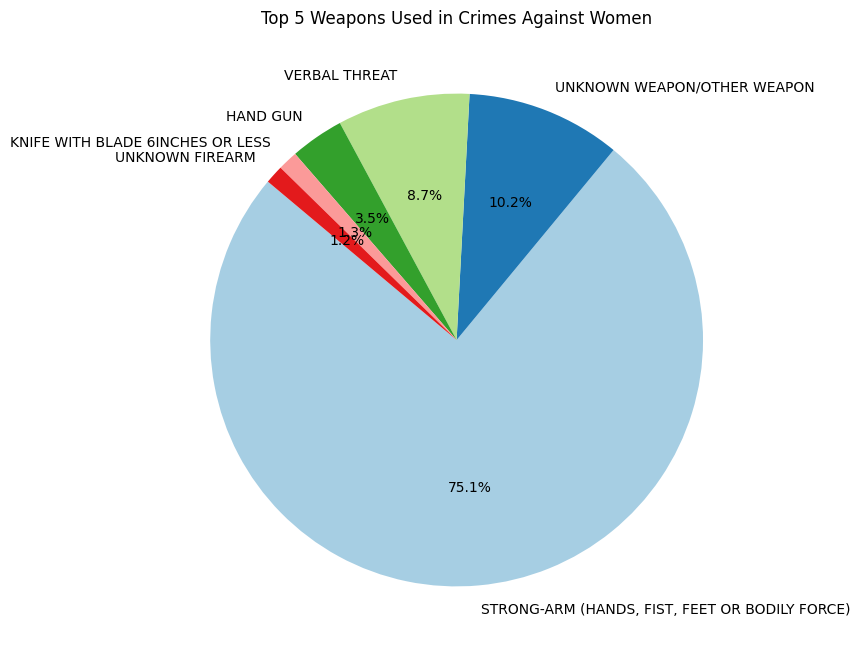

In [97]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=sizes.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Weapons Used in Crimes Against Women')
plt.show()

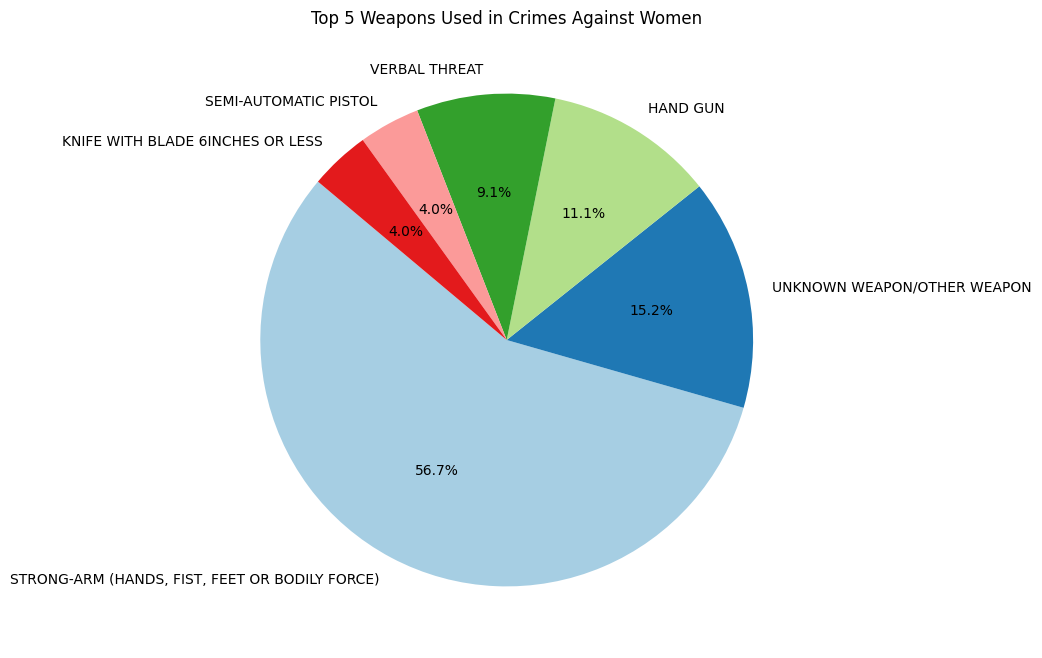

In [102]:
# Top 5 Weapons used in crimens at the men
sizes = men_victims[~men_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()[:6]
men_victims[~men_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()
 
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=sizes.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Weapons Used in Crimes Against Women')
plt.show()

In [81]:
#Women Victims with UNKNOWN WEAPON/OHTR ATTACK
women_victims[women_victims['Weapon Desc']=='UNKNOWN WEAPON/OTHER WEAPON'][['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']]

,AREA NAME,Crm Cd Desc,Weapon Desc
27,Northeast,CRIMINAL THREATS - NO WEAPON DISPLAYED,UNKNOWN WEAPON/OTHER WEAPON
149,West Valley,BRANDISH WEAPON,UNKNOWN WEAPON/OTHER WEAPON
302,Hollywood,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON
471,Foothill,ORAL COPULATION,UNKNOWN WEAPON/OTHER WEAPON
703,Central,INTIMATE PARTNER - AGGRAVATED ASSAULT,UNKNOWN WEAPON/OTHER WEAPON
...,...,...,...
966595,77th Street,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON
966599,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",UNKNOWN WEAPON/OTHER WEAPON
966749,West LA,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON
966845,Southeast,BRANDISH WEAPON,UNKNOWN WEAPON/OTHER WEAPON


In [83]:
#Top Area Tipe of Attack with UNKNOW WEAPON at Women
women_victims[women_victims['Weapon Desc']=='UNKNOWN WEAPON/OTHER WEAPON'][['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']].describe(include='object')

,AREA NAME,Crm Cd Desc,Weapon Desc
count,13397,13397,13397
unique,21,81,1
top,Pacific,BATTERY - SIMPLE ASSAULT,UNKNOWN WEAPON/OTHER WEAPON
freq,1580,2760,13397


In [87]:
women_victims[women_victims['Crm Cd Desc']=='ORAL COPULATION'][['AREA NAME', 'Vict Age', 'Vict Descent', 'Status Desc']].describe()

,Vict Age
count,526.000000
mean,26.452471
std,15.627833
min,0.000000
25%,14.000000
50%,24.000000
75%,35.000000
max,82.000000


The average age of women who were ORAL COPULATION is 26 years old

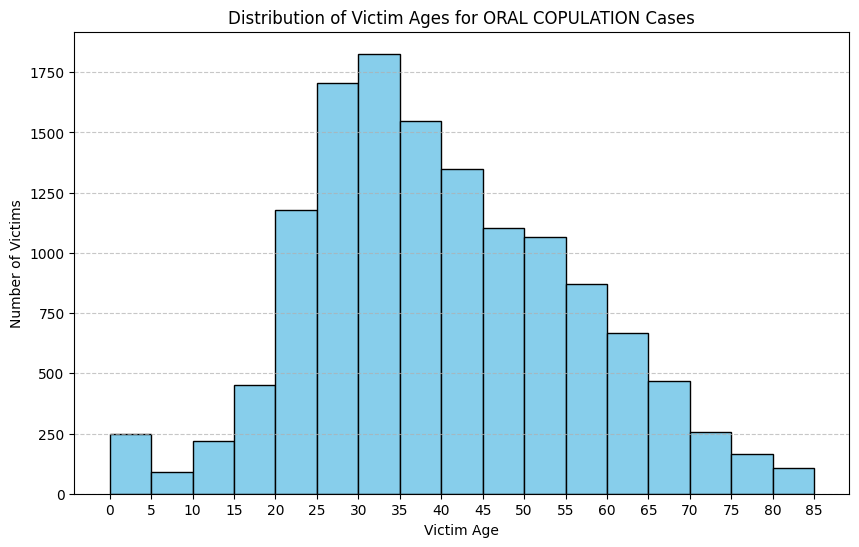

In [98]:
victim_ages = women_victims[women_victims['Weapon Desc']=='UNKNOWN WEAPON/OTHER WEAPON']['Vict Age']
plt.figure(figsize=(10, 6))
plt.hist(victim_ages, bins=range(0, 90, 5), color='skyblue', edgecolor='black')

plt.title('Distribution of Victim Ages for ORAL COPULATION Cases')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.xticks(range(0, 90, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

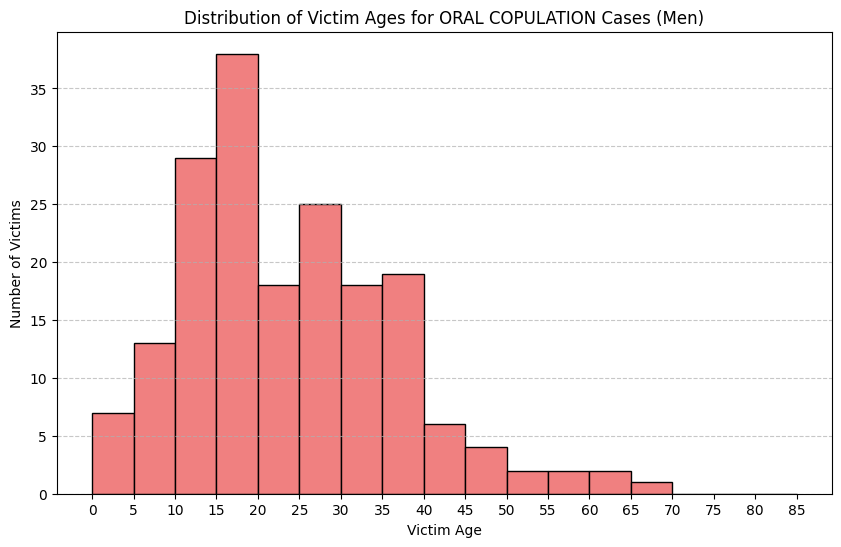

In [99]:
victim_ages_men = men_victims[men_victims['Crm Cd Desc']=='ORAL COPULATION']['Vict Age']
plt.figure(figsize=(10, 6))
plt.hist(victim_ages_men, bins=range(0, 90, 5), color='lightcoral', edgecolor='black')

plt.title('Distribution of Victim Ages for ORAL COPULATION Cases (Men)')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.xticks(range(0, 90, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


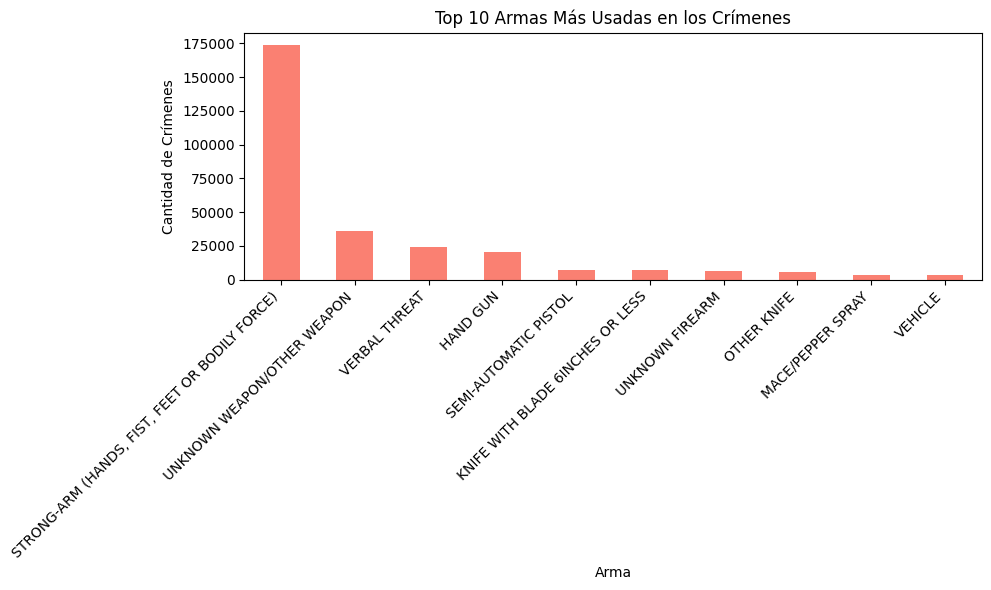

In [104]:
# Contar las armas más usadas en los crímenes
weapon_usage = df_raw['Weapon Desc'].value_counts().head(10)

# Graficar las armas más usadas
plt.figure(figsize=(10, 6))
weapon_usage.plot(kind='bar', color='salmon')
plt.title('Top 10 Armas Más Usadas en los Crímenes')
plt.xlabel('Arma')
plt.ylabel('Cantidad de Crímenes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

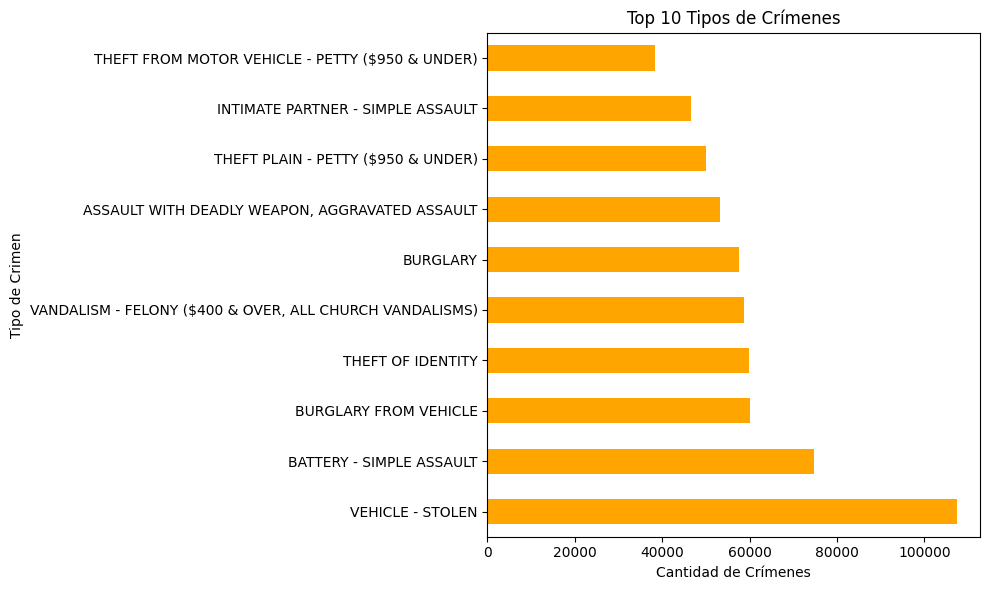

In [105]:
# Contar el número de crímenes por tipo
crime_types = df_raw['Crm Cd Desc'].value_counts().head(10)

# Graficar la distribución de los crímenes por tipo
plt.figure(figsize=(10, 6))
crime_types.plot(kind='barh', color='orange')
plt.title('Top 10 Tipos de Crímenes')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Tipo de Crimen')
plt.tight_layout()
plt.show()